In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_squared_error,mean_squared_log_error,make_scorer
from sklearn.pipeline import make_pipeline
from sklearn.tree import ExtraTreeRegressor
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV,RandomizedSearchCV

In [3]:
df = pd.read_csv("Downloads/dataset 2/train.csv")
df.head()

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
0,BRAE2NF6JA5GUEXG,37.0,2015-08-22 18:36:12.000,2,Lillyann,Yes,Fashion,1,68,0.0,376.0,11.0,2983.0,4713.0,4185.947700
1,TUNE8SFB6RJN2HSD,38.0,2016-03-27 21:19:13.000,24,Klynn,Yes,Fashion,0,51,0.0,397.0,12.0,7495.0,10352.0,9271.490256
2,BRAEAR7WZPQGPBZU,9.0,2015-08-18 19:25:22.000,447,Ridge,Yes,Child_care,0,10,0.0,250.0,9.0,5752.0,7309.0,6785.701362
3,WATDZ2ZQ8JPDHCTJ,50.0,2016-03-28 21:53:01.000,23,Abran,Yes,Educational,2,48,0.0,144.0,13.0,5090.0,20814.0,13028.917824
4,JWSEBUKYQPMBZ3RK,7.0,2016-03-29 22:58:53.000,63,Dustyn,Yes,Repair,1,35,1.0,211.0,4.0,2430.0,9261.0,906.553935


In [4]:
df1 = pd.read_csv("downloads/dataset 2/test.csv")
df1.head()

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price
0,SCHE4YSTDVPVZVXW,39.0,2016-01-13 07:45:08.000,205,Ivanka,No,Fashion,0,90,0,380.0,16.0,2576.0,3340
1,ACCEGCATKHNRXUHW,49.0,2015-08-23 20:37:05.000,3,Isaak,Yes,Fashion,0,87,0,393.0,16.0,1202.0,1955
2,NKCE6GJ5XVJDXNNZ,1.0,2015-11-14 18:12:39.000,183,Analiese,No,Technology,2,55,0,493.0,9.0,7175.0,15715
3,NKCEB8BK3ZXDHDHM,8.0,2015-11-21 04:56:19.000,358,Rusty,Yes,Child_care,3,86,0,303.0,16.0,5404.0,13078
4,TOPEFDXSAHRNPF94,33.0,2015-05-06 15:09:46.000,167,Eloise,No,Technology,0,27,0,567.0,16.0,4069.0,6244


In [5]:
df.corr()

,Stall_no,Market_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
Stall_no,1.000000,-0.006145,-0.003449,0.004302,-0.019656,-0.010224,-0.004745,0.000123,0.008443,0.011733
Market_Category,-0.006145,1.000000,-0.036346,-0.018800,-0.003306,0.019009,0.024154,0.194787,0.134257,0.138711
Grade,-0.003449,-0.036346,1.000000,0.010107,-0.025232,-0.025316,-0.016644,-0.079583,0.164350,0.086450
Demand,0.004302,-0.018800,0.010107,1.000000,0.010230,-0.007370,0.017653,0.010283,0.003987,-0.000601
Discount_avail,-0.019656,-0.003306,-0.025232,0.010230,1.000000,-0.003899,0.018905,0.009817,-0.003918,-0.512457
charges_1,-0.010224,0.019009,-0.025316,-0.007370,-0.003899,1.000000,0.270625,0.019448,0.012169,0.053045
charges_2 (%),-0.004745,0.024154,-0.016644,0.017653,0.018905,0.270625,1.000000,0.005448,0.009816,0.009031
Minimum_price,0.000123,0.194787,-0.079583,0.010283,0.009817,0.019448,0.005448,1.000000,0.708038,0.700444
Maximum_price,0.008443,0.134257,0.164350,0.003987,-0.003918,0.012169,0.009816,0.708038,1.000000,0.766928
Selling_Price,0.011733,0.138711,0.086450,-0.000601,-0.512457,0.053045,0.009031,0.700444,0.766928,1.000000


In [6]:
df.describe()

,Stall_no,Market_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
count,6363.000000,6368.000000,6368.000000,6368.000000,6330.000000,6170.000000,6163.000000,6330.000000,6025.000000,6327.000000
mean,25.309445,199.340609,0.643687,50.921168,0.140442,264.514100,10.146195,3531.349763,6432.545892,4563.242592
std,14.328980,170.275570,1.025092,29.091922,0.347473,124.483056,4.318339,2194.729604,3716.177364,2979.102408
min,1.000000,0.000000,0.000000,1.000000,0.000000,100.000000,1.000000,1.000000,404.000000,-6062.470000
25%,13.000000,55.000000,0.000000,26.000000,0.000000,163.000000,7.000000,1879.250000,3918.000000,2450.005280
50%,25.000000,132.000000,0.000000,51.000000,0.000000,252.000000,10.000000,3157.500000,5634.000000,4210.384640
75%,37.000000,403.000000,2.000000,76.000000,0.000000,314.000000,14.000000,4697.000000,8126.000000,6167.643252
max,50.000000,471.000000,3.000000,100.000000,1.000000,649.000000,17.000000,17580.000000,58812.000000,22638.325941


In [7]:
df.isnull().sum()

Product_id            0
Stall_no              5
instock_date          0
Market_Category       0
Customer_name       211
Loyalty_customer      0
Product_Category      0
Grade                 0
Demand                0
Discount_avail       38
charges_1           198
charges_2 (%)       205
Minimum_price        38
Maximum_price       343
Selling_Price        41
dtype: int64

In [8]:
df.head()

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
0,BRAE2NF6JA5GUEXG,37.0,2015-08-22 18:36:12.000,2,Lillyann,Yes,Fashion,1,68,0.0,376.0,11.0,2983.0,4713.0,4185.947700
1,TUNE8SFB6RJN2HSD,38.0,2016-03-27 21:19:13.000,24,Klynn,Yes,Fashion,0,51,0.0,397.0,12.0,7495.0,10352.0,9271.490256
2,BRAEAR7WZPQGPBZU,9.0,2015-08-18 19:25:22.000,447,Ridge,Yes,Child_care,0,10,0.0,250.0,9.0,5752.0,7309.0,6785.701362
3,WATDZ2ZQ8JPDHCTJ,50.0,2016-03-28 21:53:01.000,23,Abran,Yes,Educational,2,48,0.0,144.0,13.0,5090.0,20814.0,13028.917824
4,JWSEBUKYQPMBZ3RK,7.0,2016-03-29 22:58:53.000,63,Dustyn,Yes,Repair,1,35,1.0,211.0,4.0,2430.0,9261.0,906.553935


In [9]:
# droping off columns those dosen't contribute in to solve the problem


In [10]:
df = df.drop(['instock_date', 'Customer_name'], axis = 1)

In [11]:
df.head()

,Product_id,Stall_no,Market_Category,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
0,BRAE2NF6JA5GUEXG,37.0,2,Yes,Fashion,1,68,0.0,376.0,11.0,2983.0,4713.0,4185.947700
1,TUNE8SFB6RJN2HSD,38.0,24,Yes,Fashion,0,51,0.0,397.0,12.0,7495.0,10352.0,9271.490256
2,BRAEAR7WZPQGPBZU,9.0,447,Yes,Child_care,0,10,0.0,250.0,9.0,5752.0,7309.0,6785.701362
3,WATDZ2ZQ8JPDHCTJ,50.0,23,Yes,Educational,2,48,0.0,144.0,13.0,5090.0,20814.0,13028.917824
4,JWSEBUKYQPMBZ3RK,7.0,63,Yes,Repair,1,35,1.0,211.0,4.0,2430.0,9261.0,906.553935


In [12]:
df.shape

(6368, 13)

In [13]:
# 

In [14]:
# x.head()

In [15]:
# y.head()

In [16]:
# we will find the correlation between the independent variables
# if they are having high corr. then we can drop those columns because they are similar in some terms


In [17]:
df.isnull().sum()

Product_id            0
Stall_no              5
Market_Category       0
Loyalty_customer      0
Product_Category      0
Grade                 0
Demand                0
Discount_avail       38
charges_1           198
charges_2 (%)       205
Minimum_price        38
Maximum_price       343
Selling_Price        41
dtype: int64

In [18]:
# writing a function to fill null values
def fillmedian(a):
    lst = ['Stall_no', 'Discount_avail', 'charges_1', 'charges_2 (%)', 'Minimum_price', 'Maximum_price']
    for el in lst:
        a[el] = a[el].fillna(a[el].mean())
    return a

In [19]:
# print(df)
df.isnull().sum()

Product_id            0
Stall_no              5
Market_Category       0
Loyalty_customer      0
Product_Category      0
Grade                 0
Demand                0
Discount_avail       38
charges_1           198
charges_2 (%)       205
Minimum_price        38
Maximum_price       343
Selling_Price        41
dtype: int64

In [20]:
# to fill the max and min prices based on min = 2*sp-max
def fillcost(a):
    for i in range(a.shape[0]):
        if np.isnan(a.iloc[i, 11]):
            a.iloc[i, 11] = 2*a.iloc[i, 12]-a.iloc[i,10]
        if np.isnan(a.iloc[i, 10]):
            a.iloc[i,10] = 2*a.iloc[i, 12]-a.iloc[i,11]
    return a  

In [21]:
# converting categorical features to numeric features

In [22]:
def cat2num(a):
    df.Loyalty_customer = a.Loyalty_customer.replace({'Yes':1,
                                                      'No':0})
    a.Product_Category = a.Product_Category
    a.Product_Category = a.Product_Category.astype('category')
    a['Product_Category'] = df.Product_Category.cat.codes
    return a

In [23]:
# doing preprocessing on train df
df = cat2num(fillcost(fillmedian(df)))

In [24]:
df.isna().sum()

Product_id           0
Stall_no             0
Market_Category      0
Loyalty_customer     0
Product_Category     0
Grade                0
Demand               0
Discount_avail       0
charges_1            0
charges_2 (%)        0
Minimum_price        0
Maximum_price        0
Selling_Price       41
dtype: int64

In [25]:
df.dropna(inplace = True)

In [26]:
df.isna().sum()

Product_id          0
Stall_no            0
Market_Category     0
Loyalty_customer    0
Product_Category    0
Grade               0
Demand              0
Discount_avail      0
charges_1           0
charges_2 (%)       0
Minimum_price       0
Maximum_price       0
Selling_Price       0
dtype: int64

In [27]:
df.shape

(6327, 13)

In [28]:
type(df)

pandas.core.frame.DataFrame

In [29]:
df.columns

Index(['Product_id', 'Stall_no', 'Market_Category', 'Loyalty_customer',
       'Product_Category', 'Grade', 'Demand', 'Discount_avail', 'charges_1',
       'charges_2 (%)', 'Minimum_price', 'Maximum_price', 'Selling_Price'],
      dtype='object')

In [30]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [31]:
x.head()

,Product_id,Stall_no,Market_Category,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price
0,BRAE2NF6JA5GUEXG,37.0,2,1,3,1,68,0.0,376.0,11.0,2983.0,4713.0
1,TUNE8SFB6RJN2HSD,38.0,24,1,3,0,51,0.0,397.0,12.0,7495.0,10352.0
2,BRAEAR7WZPQGPBZU,9.0,447,1,0,0,10,0.0,250.0,9.0,5752.0,7309.0
3,WATDZ2ZQ8JPDHCTJ,50.0,23,1,2,2,48,0.0,144.0,13.0,5090.0,20814.0
4,JWSEBUKYQPMBZ3RK,7.0,63,1,8,1,35,1.0,211.0,4.0,2430.0,9261.0


In [32]:
y.head()

0     4185.947700
1     9271.490256
2     6785.701362
3    13028.917824
4      906.553935
Name: Selling_Price, dtype: float64

In [33]:
# defining the correlation b/w features

<AxesSubplot:>

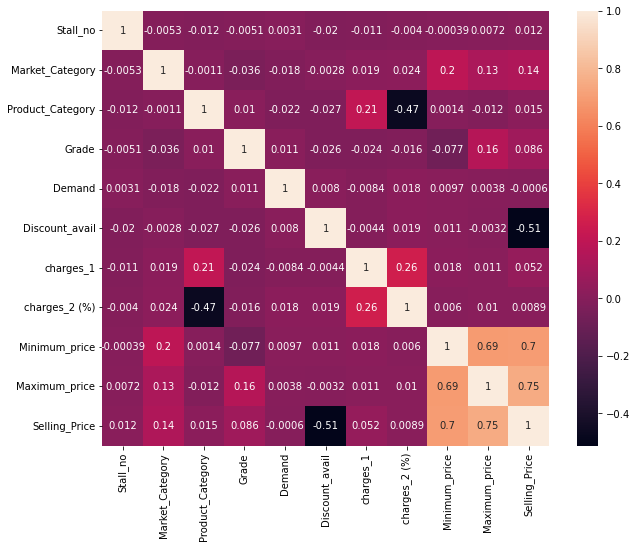

In [34]:
plt.figure(figsize = (10, 8))
sns.heatmap(df.corr(), annot = True)

In [35]:
def corrIndata(dataset, threshold):
    coll_corr = set()
    corr_metrix = dataset.corr()
    for i in range (len(corr_metrix.columns)):
        for j in range(i):
            if abs(corr_metrix.iloc[i,j])>threshold:
                colname = corr_metrix.iloc[i]
                coll_corr.add(colname)
                
                
    return coll_corr          

In [36]:
corr_features = corrIndata(x, 0.8)

In [37]:
len(set(corr_features))

0

In [38]:
corr_features

set()

In [71]:
selcol = ['Market_Category','Grade',
          'Discount_avail','charges_1','Minimum_price','Maximum_price','charges_1','charges_2 (%)']

In [72]:
# appllying linear regresion

In [40]:
from sklearn.linear_model import LinearRegression

In [41]:
x_train, x_test, y_train, y_test = train_test_split(df[selcol], df.Selling_Price)

In [42]:
model = LinearRegression()
model.fit(df[selcol], df.Selling_Price)

LinearRegression()

In [43]:
y_pred = model.predict(x_test)

In [44]:
y_pred

array([ 752.39623391, 4564.89919805, 3759.19000535, ..., 4102.76142223,
       5461.54854908, 6668.23221758])

In [73]:
mean_squared_error(y_test, y_pred)

1402122.8584093638

In [79]:
# applying random forest

In [74]:
rfr = RandomForestRegressor(random_state  = 0,n_estimators= 200,n_jobs=-1)

In [75]:
rfr.fit(df[selcol],df.Selling_Price)

RandomForestRegressor(n_estimators=200, n_jobs=-1, random_state=0)

In [76]:
yp = rfr.predict(x_test)

In [77]:
yp

array([ 788.39082072, 4473.7647837 , 3592.6033093 , ..., 3978.45829157,
       5505.42605358, 6797.35382615])

In [78]:
mean_squared_error(y_test, yp)

225200.2569768791

In [51]:
df1.head()

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price
0,SCHE4YSTDVPVZVXW,39.0,2016-01-13 07:45:08.000,205,Ivanka,No,Fashion,0,90,0,380.0,16.0,2576.0,3340
1,ACCEGCATKHNRXUHW,49.0,2015-08-23 20:37:05.000,3,Isaak,Yes,Fashion,0,87,0,393.0,16.0,1202.0,1955
2,NKCE6GJ5XVJDXNNZ,1.0,2015-11-14 18:12:39.000,183,Analiese,No,Technology,2,55,0,493.0,9.0,7175.0,15715
3,NKCEB8BK3ZXDHDHM,8.0,2015-11-21 04:56:19.000,358,Rusty,Yes,Child_care,3,86,0,303.0,16.0,5404.0,13078
4,TOPEFDXSAHRNPF94,33.0,2015-05-06 15:09:46.000,167,Eloise,No,Technology,0,27,0,567.0,16.0,4069.0,6244


In [52]:
df1.isna().sum()

Product_id           0
Stall_no             1
instock_date         0
Market_Category      0
Customer_name       53
Loyalty_customer     0
Product_Category     0
Grade                0
Demand               0
Discount_avail       0
charges_1           36
charges_2 (%)        5
Minimum_price       14
Maximum_price        0
dtype: int64

In [54]:
# df1 = cat2num(fillmedian(df1))
df1 = fillmedian(df1)

In [56]:
df1.dropna(inplace = True)

In [57]:
df1.isna().sum()

Product_id          0
Stall_no            0
instock_date        0
Market_Category     0
Customer_name       0
Loyalty_customer    0
Product_Category    0
Grade               0
Demand              0
Discount_avail      0
charges_1           0
charges_2 (%)       0
Minimum_price       0
Maximum_price       0
dtype: int64

In [58]:
yf = rfr.predict(df1.drop('Product_id', axis = 1)[selcol])

In [59]:
yf

array([ 3267.55639577,  1957.28709232, 11684.24783736, ...,
        6434.7312583 ,  3829.31004476,  1013.21513971])

In [67]:
# 

In [60]:
df1 = df1.drop(['instock_date', 'Customer_name'], axis = 1)

In [61]:
df1.head()

,Product_id,Stall_no,Market_Category,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price
0,SCHE4YSTDVPVZVXW,39.0,205,No,Fashion,0,90,0,380.0,16.0,2576.0,3340
1,ACCEGCATKHNRXUHW,49.0,3,Yes,Fashion,0,87,0,393.0,16.0,1202.0,1955
2,NKCE6GJ5XVJDXNNZ,1.0,183,No,Technology,2,55,0,493.0,9.0,7175.0,15715
3,NKCEB8BK3ZXDHDHM,8.0,358,Yes,Child_care,3,86,0,303.0,16.0,5404.0,13078
4,TOPEFDXSAHRNPF94,33.0,167,No,Technology,0,27,0,567.0,16.0,4069.0,6244


In [62]:
df1.columns

Index(['Product_id', 'Stall_no', 'Market_Category', 'Loyalty_customer',
       'Product_Category', 'Grade', 'Demand', 'Discount_avail', 'charges_1',
       'charges_2 (%)', 'Minimum_price', 'Maximum_price'],
      dtype='object')

In [ ]:
# final = pd.DataFrame((zip(test['Product_id'],yf)),columns=['Product_id','Selling_Price'])

In [63]:
final = pd.DataFrame((zip(df1['Product_id'], yf)), columns = ['Product_id', 'Selling_Price'])

In [64]:
final

,Product_id,Selling_Price
0,SCHE4YSTDVPVZVXW,3267.556396
1,ACCEGCATKHNRXUHW,1957.287092
2,NKCE6GJ5XVJDXNNZ,11684.247837
3,NKCEB8BK3ZXDHDHM,9386.201598
4,TOPEFDXSAHRNPF94,5656.967754
...,...,...
3372,BBAE9K7BXFUTDNBK,3973.214795
3373,RTRDYPA4PJHCJCGF,9056.153204
3374,TUNE8FWQBS7TVVT7,6434.731258
3375,NKCEGMUABCRGUZPE,3829.310045


In [82]:
from sklearn.metrics import r2_score
score = r2_score(y_test, yp)
# score random forest

In [83]:
score

0.9765867383720925

In [84]:
from sklearn.metrics import r2_score
score_lr = r2_score(y_test, y_pred)
# score linear regression

In [85]:
score_lr

0.8542263238990075